In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



df = pd.read_csv('/content/drive/My Drive/Hyperion/Titanic.csv')
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# checking to see how many NaNs are in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# for our purposes, we won't be needing these three columns 
# it would have been nice to see if there was a relationship between
# survival and cabin location, but cabin information is low
df.drop(['Ticket','Name','Cabin'], axis=1, inplace=True)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# checking how many passengers there are in each class
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

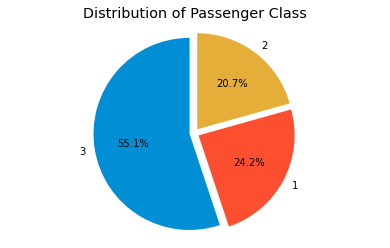

In [6]:
# Showing class distribution with pie chart

classes = list(df.Pclass.value_counts().index)
fig1, ax = plt.subplots()
ax.pie(df['Pclass'].value_counts(), explode=[0.05, 0.05, 0.05],  labels=(classes[0], classes[1], classes[2]), autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title("Distribution of Passenger Class")
plt.show()

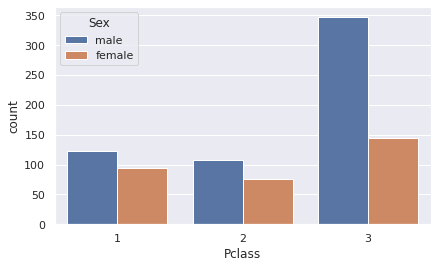

In [7]:
# Plotting passengers by class and Gender
sns.set(style="darkgrid")
ax = sns.countplot(x='Pclass', hue='Sex', data=df)

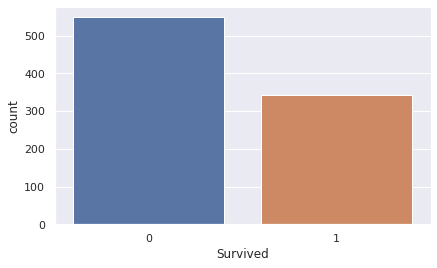

In [8]:
# getting a visualization of total survivors
sns.countplot(df['Survived'], label="Count")

In [9]:
# checking for youngest and oldest male and female survivors
youngest_female_survivor = df[df['Sex']=='female'][df[df['Sex']=='female']['Survived'] == True]['Age'].min()
oldest_female_survivor = df[df['Sex']=='female'][df[df['Sex']=='female']['Survived'] == True]['Age'].max()
youngest_female_victim = df[df['Sex']=='female'][df[df['Sex']=='female']['Survived'] == False]['Age'].min()
oldest_female_victim = df[df['Sex']=='female'][df[df['Sex']=='female']['Survived'] == False]['Age'].max()
youngest_male_survivor = df[df['Sex']=='male'][df[df['Sex']=='male']['Survived'] == True]['Age'].min()
oldest_male_survivor = df[df['Sex']=='male'][df[df['Sex']=='male']['Survived'] == True]['Age'].max()
youngest_male_victim = df[df['Sex']=='male'][df[df['Sex']=='male']['Survived'] == False]['Age'].min()
oldest_male_victim = df[df['Sex']=='male'][df[df['Sex']=='male']['Survived'] == False]['Age'].max()

print(f'''Youngest female survivor : {youngest_female_survivor}
Oldest female survivor   : {oldest_female_survivor}
Youngest female victim   : {youngest_female_victim}
Oldest female victim     : {oldest_female_victim}
Youngest male survivor   : {youngest_male_survivor}
Oldest male survivor     : {oldest_male_survivor}
Youngest male victim     : {youngest_male_victim}
Oldest male victim       : {oldest_male_victim}''')

Youngest female survivor : 0.75
Oldest female survivor   : 63.0
Youngest female victim   : 2.0
Oldest female victim     : 57.0
Youngest male survivor   : 0.42
Oldest male survivor     : 80.0
Youngest male victim     : 1.0
Oldest male victim       : 74.0


In [10]:
df.groupby(['Pclass','Survived','Sex']).size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

[]

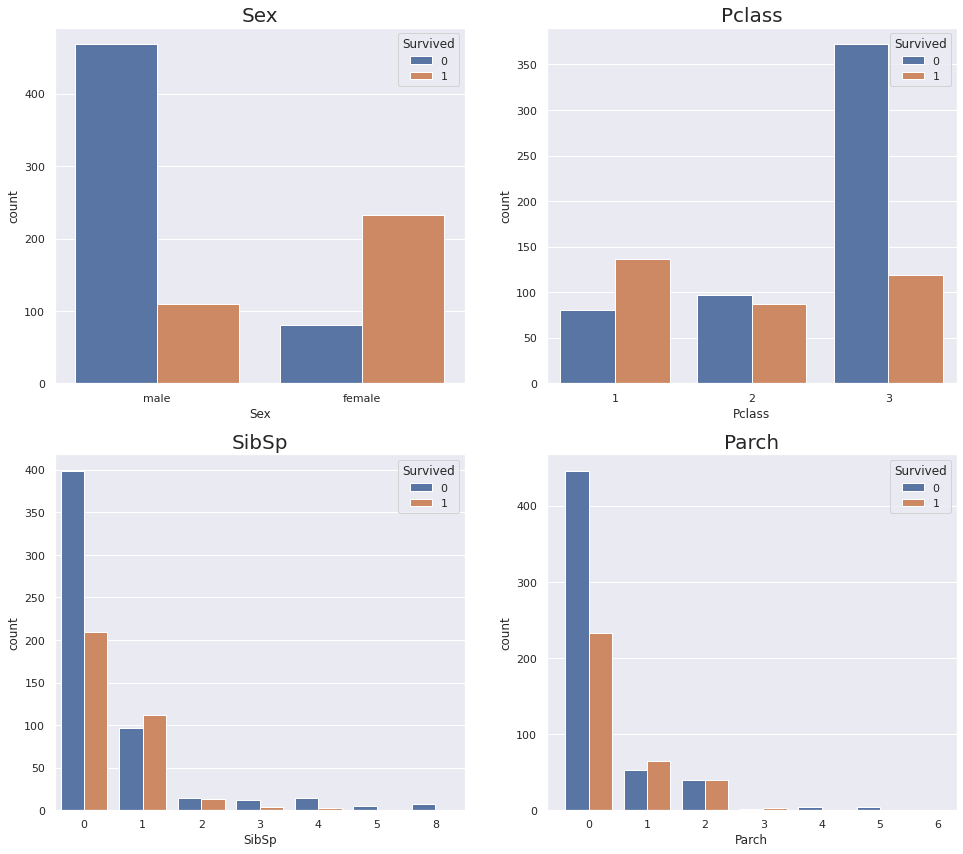

In [11]:
# Visualizing survivorship for selected columns
columns = ['Sex', 'Pclass', 'SibSp', 'Parch']

# creating coordinates for array of graphs
rows = 2
cols = 2

# initializing graphs
fig, axs = plt.subplots(rows, cols, figsize=(cols*7.2,rows*7.2))

for j in range(0,rows):
  for k in range(0,cols):  
    i = j*cols+ k     
    ax = axs[j][k]
    sns.countplot(df[columns[i]], hue=df['Survived'], ax=ax)
    ax.set_title(columns[i], fontsize=20)
    ax.legend(title='Survived', loc='upper right') 
        
plt.plot()

In [12]:
# getting survival rates based on sex, class, and fare
survive_sex = df.groupby('Sex')[['Survived']].mean()
survive_class = df.groupby('Pclass')[['Survived']].mean()
survive_fare = df.groupby('Survived')[['Fare']].mean()

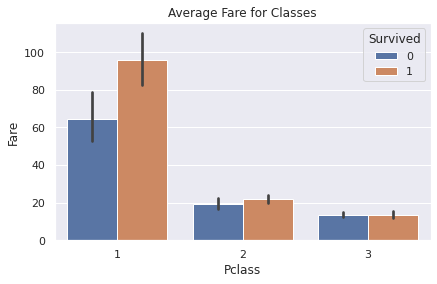

In [13]:
sns.barplot(x='Pclass',y='Fare',hue='Survived',data=df)
# plt.ylabel("")
# plt.xlabel("Pclass")
plt.title('Average Fare for Classes');

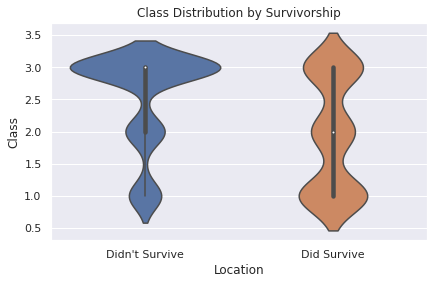

In [14]:
p = sns.violinplot(data = df, x = 'Survived', y = 'Pclass')
p.set(title='Class Distribution by Survivorship', xlabel='Location', ylabel='Class', xticklabels=['Didn\'t Survive','Did Survive']);

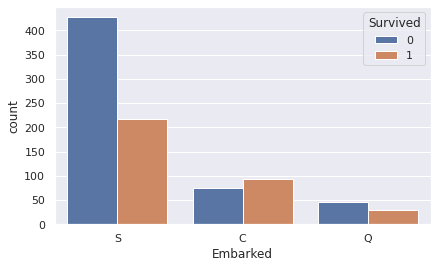

In [15]:
# Barchart of Survival vs Port of Embarkation
ax = sns.countplot(x="Embarked", hue="Survived", data=df)

Wow, we can see that the roup who embarked from S had many more survivors and many, many deaths than the other two embarking locations. I hypothesize that the group that left from S has the largest group of both first class and third class voyagers.

In [30]:
df.loc[((df.Embarked == 'S') & (df.Pclass == 1))]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
11,12,1,1,female,58.0,0,0,26.5500,S
23,24,1,1,male,28.0,0,0,35.5000,S
27,28,0,1,male,19.0,3,2,263.0000,S
...,...,...,...,...,...,...,...,...,...
862,863,1,1,female,48.0,0,0,25.9292,S
867,868,0,1,male,31.0,0,0,50.4958,S
871,872,1,1,female,47.0,1,1,52.5542,S
872,873,0,1,male,33.0,0,0,5.0000,S


In [31]:
df.loc[((df.Embarked == 'C') & (df.Pclass == 1))]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
245,246,0,1,male,44.0,2,0,90.0,Q
412,413,1,1,female,33.0,1,0,90.0,Q


In [35]:
df.loc[((df.Embarked == 'S') & (df.Pclass == 3))]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
4,5,0,3,male,35.0,0,0,8.0500,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
...,...,...,...,...,...,...,...,...,...
878,879,0,3,male,NaN,0,0,7.8958,S
881,882,0,3,male,33.0,0,0,7.8958,S
882,883,0,3,female,22.0,0,0,10.5167,S
884,885,0,3,male,25.0,0,0,7.0500,S


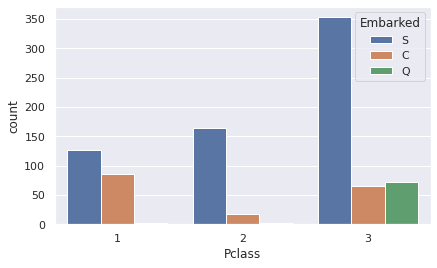

In [36]:
# Barchart of Survival of Port of Embarkation
ax = sns.countplot(x='Pclass', hue='Embarked', data=df)

We can see that I was right, and that both 1st and 3rd classes had their majority embark as S